# Imports

In [ ]:
# Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
import sys
import os
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
# Modules
from src.risk.covariance import load_returns, compute_sample_cov, compute_expected_returns
from src.risk.optimization import min_volatility, max_sharpe, portfolio_performance
from src.utils import plot_correlation_heatmap, plot_efficient_frontier, plot_weights_bar

# Load Data

In [3]:
returns_df = load_returns(start_date='2024-12-09')
returns_df.head()

ticker,AAPL,AMZN,BAC,GOOGL,JPM,MSFT,NVDA,SPY,TSLA,VTI
date,,,,,,,,,,
2024-12-09,0.016091,-0.004140,-0.017947,0.004947,-0.014325,0.005519,-0.025492,-0.005146,0.001464,-0.006395
2024-12-10,0.004112,-0.004644,-0.003566,0.055870,-0.003895,-0.006030,-0.026951,-0.003113,0.028733,-0.003740
2024-12-11,-0.005149,0.023196,0.007381,0.055245,0.002733,0.012770,0.031400,0.007724,0.059303,0.008050
2024-12-12,0.005950,-0.005602,0.000000,-0.017622,-0.008219,0.001279,-0.014145,-0.005149,-0.015703,-0.005704
2024-12-13,0.000689,-0.006595,-0.008881,-0.011140,-0.006553,-0.005109,-0.022505,-0.000201,0.043363,-0.000506


In [ ]:
cov_matrix = compute_sample_cov(returns_df)
exp_returns = compute_expected_returns(returns_df, 20)
exp_returns.head()

ticker
AAPL     0.010948
AMZN     0.003361
BAC      0.011534
GOOGL    0.036909
JPM      0.016744
dtype: float64

In [7]:
weights_min_vol = min_volatility(exp_returns, cov_matrix)
weights_max_sharpe = max_sharpe(exp_returns, cov_matrix)


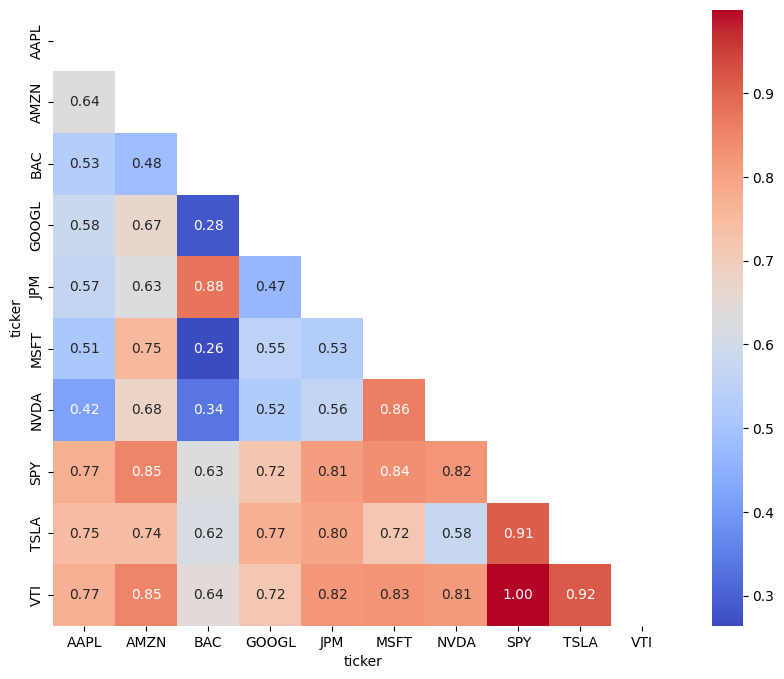

In [8]:
plot_correlation_heatmap(cov_matrix)
plot_weights_bar(weights_min_vol, returns_df.columns)
plot_weights_bar(weights_max_sharpe, returns_df.columns)